## Linear Regression
### Simple Linear Regression Basic
* Allow us to understand relaionship between two continous variables

$$ y = ax + b $$

Where `x` is independent variable and `y` is dependent variable. 

#### Aim of Linear Regression
* Minimize the distance between the points and the line $(y=ax+b)$ 
* Adjusting:
    1. Coefficents: $a$
    2. Bias/Intercept: $b$

### Building a Linear Regression Model

In [1]:
import numpy as np

In [2]:
# Building a Toy Dataset
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [4]:
# IMPORTANTL: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [5]:
# y = 2x +1
y_values = [2*i+1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [6]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [7]:
# IMPORTANTL: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

#### Build Model

In [8]:
import torch
import torch.nn as nn

1. Linear model: 
    * True Equation: $y = 2x + 1$

2. Forward Example: 
    * Input $x = 1$
    * Output $\hat{y} = ?$

In [9]:
# Create Class

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__() # inherits nn 
        self.linear = nn.Linear(input_dim, output_dim) # input_dim is x, output_dim is y
    
    def forward(self, x):
        out = self.linear(x)
        return out

#### Instantiate Model Class
* Input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
* Dessired Output: [1, 3, 5,7, 9, 11, 13, 15, 17, 19, 21]

In [10]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

#### Instantiate Loss Class
* MSE Loss: Meean Square Error

$$ \frac{1}{n}\sum{n}{i=1}(\hat{y_i}-y_i) $$

Where $\hat{y}$ is prediction and $y$ is true value.

In [11]:
criterion = nn.MSELoss()

#### Instantiate Optimizer Class
* Equation: 
    $$ \theta = \theta - \eta \cdot \nabla_{ \theta} $$

Where $\theta$ is parameters; $\eta$ is learning rate; $\theta$ is parameter's gradients.


Even simplier equation:
- parameters = parameters - learning_rate * parameters_gradients
    - parameters: $a$ and $b$ in $y = ax+b$
    - desired parameters: $a=2$ and $b=1$ in $y=2x+1$

In [12]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train Model
* epoch : going through the whoile x_train data once.
    * 100 epochs: 100xmapping x_train
* process:
    1. Convert input/labels to torch.
    2. Clear gradient buffer
    3. Get output given inputs
    4. Get loss
    5. Get Gradients w.r.t. parameters
    6. Repeat

In [13]:
epochs = 100
for epoch in range(epochs):
    epoch += 1
    
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    
    # clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # forward to get output
    outputs = model(inputs) # output is y and inputs in x
    
    # calculate loss
    loss = criterion(outputs, labels)
    
    # getting gradients w.r.t. parameters
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 1, loss 189.46298217773438
epoch 2, loss 15.456254005432129
epoch 3, loss 1.2630506753921509
epoch 4, loss 0.1053309515118599
epoch 5, loss 0.010873755440115929
epoch 6, loss 0.0031436400022357702
epoch 7, loss 0.002487950259819627
epoch 8, loss 0.0024095328990370035
epoch 9, loss 0.0023784940131008625
epoch 10, loss 0.0023516095243394375
epoch 11, loss 0.002325291046872735
epoch 12, loss 0.002299342770129442
epoch 13, loss 0.002273659221827984
epoch 14, loss 0.002248280681669712
epoch 15, loss 0.0022231684997677803
epoch 16, loss 0.002198334550485015
epoch 17, loss 0.0021737925708293915
epoch 18, loss 0.0021495299879461527
epoch 19, loss 0.0021255100145936012
epoch 20, loss 0.002101774560287595
epoch 21, loss 0.0020783001091331244
epoch 22, loss 0.0020550887566059828
epoch 23, loss 0.0020321470219641924
epoch 24, loss 0.0020094553474336863
epoch 25, loss 0.001987006049603224
epoch 26, loss 0.0019648245070129633
epoch 27, loss 0.0019428652012720704
epoch 28, loss 0.00192117237020

#### Compare Data

In [14]:
predicted = model(torch.from_numpy(x_train)).data.numpy()

In [15]:
predicted

array([[ 1.0544215],
       [ 3.0465844],
       [ 5.0387473],
       [ 7.03091  ],
       [ 9.023073 ],
       [11.015236 ],
       [13.007399 ],
       [14.999561 ],
       [16.991724 ],
       [18.983889 ],
       [20.976051 ]], dtype=float32)

In [16]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

#### Plot Graph

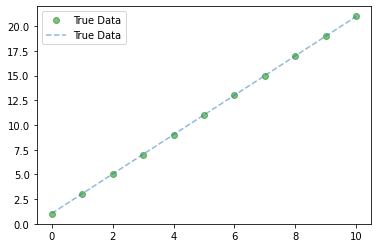

In [17]:
import matplotlib.pyplot as plt

# clear figure
plt.clf()

# get predictions
predicted = model(torch.from_numpy(x_train)).data.numpy()

# plat true data
plt.plot(x_train, y_train, 'go', label='True Data', alpha=0.5)

# plat true data
plt.plot(x_train, predicted, '--', label='True Data', alpha=0.5)

# legend and plot
plt.legend(loc='best')
plt.show()

#### Save Model

In [18]:
save_model = False
if save_model:
    # Save only parameters
    torch.save(model.state_dict(), 'lr_model.pkl')

#### Load Model

In [19]:
load_model = True
if load_model is True:
    model.load_state_dict(torch.load('lr_model.pkl'))